# MDS Visualization Using Pairwise Distance Matrix

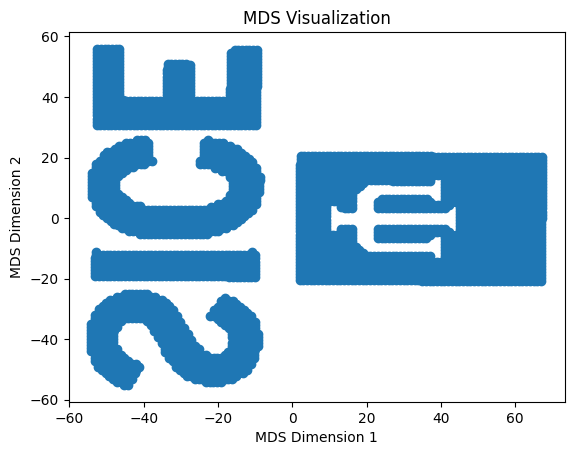

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

if __name__ == '__main__':
    file = scipy.io.loadmat('/content/MDS_pdist.mat')
    L = file["L"]

    column_means = np.mean(L, axis=0)
    L = L - column_means

    row_means = np.mean(L, axis=1)
    L = L - row_means.reshape(-1, 1)

    L = L / (-2)

    eigenvalues, eigenvectors = np.linalg.eig(L)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    mds_result = np.real(np.sqrt(np.diag(eigenvalues[:2])) @ eigenvectors[:, :2].T)

    x = mds_result[0, :]
    y = mds_result[1, :]

    plt.scatter(x, y)
    plt.xlabel('MDS Dimension 1')
    plt.ylabel('MDS Dimension 2')
    plt.title('MDS Visualization')
    plt.show()
